In [32]:
!pip install kagglehub


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harshsingh2209/supply-chain-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\nicox\.cache\kagglehub\datasets\harshsingh2209\supply-chain-analysis\versions\1


In [34]:
print(path)


C:\Users\nicox\.cache\kagglehub\datasets\harshsingh2209\supply-chain-analysis\versions\1


In [35]:
import pandas as pd
import os

file = os.listdir(path)[0]
df = pd.read_csv(path + "/" + file)

df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [36]:
cols = [
    'Product type',
    'SKU',
    'Order quantities',
    'Production volumes',
    'Location',
    'Lead times',
    'Manufacturing lead time',
    'Shipping times',
    'Manufacturing costs',
    'Shipping costs',
    'Costs',
    'Defect rates'
]

df1 = df[cols]

In [37]:
df1.shape

(100, 12)

In [38]:
df1.isna().sum()

Product type               0
SKU                        0
Order quantities           0
Production volumes         0
Location                   0
Lead times                 0
Manufacturing lead time    0
Shipping times             0
Manufacturing costs        0
Shipping costs             0
Costs                      0
Defect rates               0
dtype: int64

In [39]:
df1.describe()

,Order quantities,Production volumes,Lead times,Manufacturing lead time,Shipping times,Manufacturing costs,Shipping costs,Costs,Defect rates
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.220000,567.840000,15.960000,14.77000,5.750000,47.266693,5.548149,529.245782,2.277158
std,26.784429,263.046861,8.785801,8.91243,2.724283,28.982841,2.651376,258.301696,1.461366
min,1.000000,104.000000,1.000000,1.00000,1.000000,1.085069,1.013487,103.916248,0.018608
25%,26.000000,352.000000,8.000000,7.00000,3.750000,22.983299,3.540248,318.778455,1.009650
50%,52.000000,568.500000,17.000000,14.00000,6.000000,45.905622,5.320534,520.430444,2.141863
75%,71.250000,797.000000,24.000000,23.00000,8.000000,68.621026,7.601695,763.078231,3.563995
max,96.000000,985.000000,30.000000,30.00000,10.000000,99.466109,9.929816,997.413450,4.939255


In [40]:
df1.groupby('Location')['Lead times'].mean().sort_values(ascending=False)

Location
Delhi        17.666667
Chennai      17.150000
Kolkata      15.920000
Bangalore    15.333333
Mumbai       14.272727
Name: Lead times, dtype: float64

In [41]:
df1.groupby('Location')['Costs'].mean().sort_values(ascending=False)

Location
Chennai      621.750660
Bangalore    586.706747
Delhi        548.237877
Kolkata      491.269802
Mumbai       428.342290
Name: Costs, dtype: float64

In [42]:
df1.groupby('Location')['Defect rates'].mean().sort_values(ascending=False)

Location
Chennai      2.638256
Kolkata      2.285766
Delhi        2.228639
Mumbai       2.122339
Bangalore    2.093640
Name: Defect rates, dtype: float64

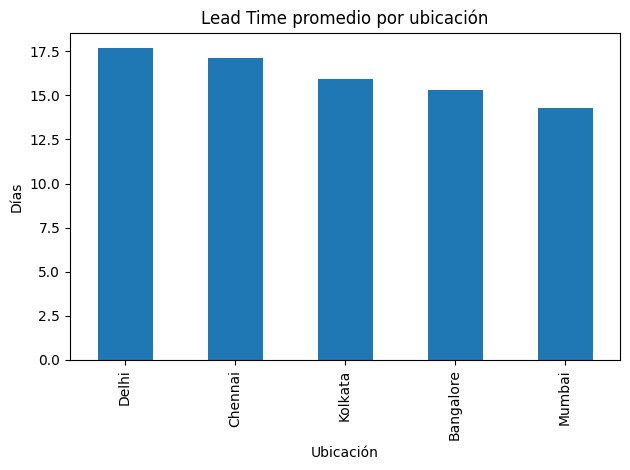

In [43]:
import matplotlib.pyplot as plt

lead_time_by_location = df1.groupby('Location')['Lead times'].mean().sort_values(ascending=False)

plt.figure()
lead_time_by_location.plot(kind='bar')
plt.title('Lead Time promedio por ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Días')
plt.tight_layout()
plt.savefig('lead_time_by_location.png', dpi=300)
plt.show()

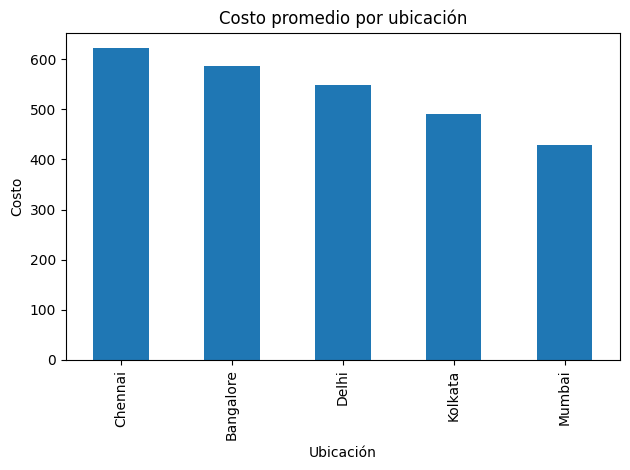

In [44]:
cost_by_location = df1.groupby('Location')['Costs'].mean().sort_values(ascending=False)

plt.figure()
cost_by_location.plot(kind='bar')
plt.title('Costo promedio por ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Costo')
plt.tight_layout()
plt.savefig('cost_by_location.png', dpi=300)
plt.show()

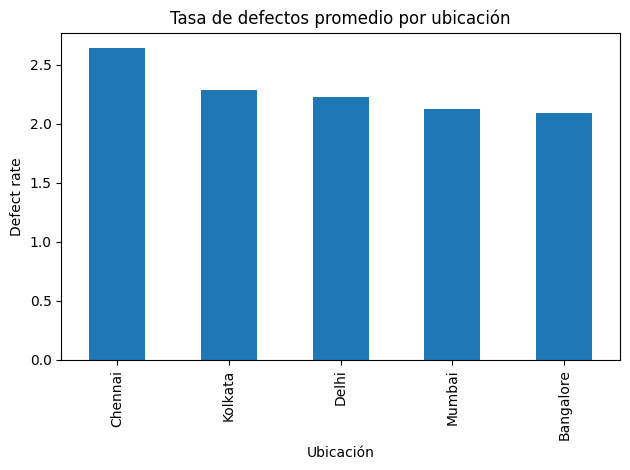

In [45]:
defects_by_location = df1.groupby('Location')['Defect rates'].mean().sort_values(ascending=False)

plt.figure()
defects_by_location.plot(kind='bar')
plt.title('Tasa de defectos promedio por ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Defect rate')
plt.tight_layout()
plt.savefig('defects_by_location.png', dpi=300)
plt.show()